# BANK CUSTOMER CHURN MODEL

# OBJECTIVE
# 1. IMPORT LIBRARY
# 2. IMPORT DATA
# 3. DATA VISUALIZATION
# 4. DATA PREPROCESSING
# 5. FEATURE VARIABLES (X) AND TARGET VARIABLE (Y)
# 6. HANDLING IMBALANCE DATA
   # (a). RANDOM UNDER SAMPLING
   # (b). RANDOM OVER SAMPLING
# 7. TRAIN TEST SPLITS
# 8. SUPPORT VECTOR MACHINE CLASSIFIER 
# 9. MODEL ACCURACY

# (1) IMPORT LIBRARY

In [1332]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

# (2) IMPORT DATA

In [1334]:
df = pd.read_csv("https://raw.githubusercontent.com/ksubrat9/BCCM/refs/heads/main/Bank%20Churn%20Modelling.csv")

In [1335]:
df.head()

,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,Num Of Products,Has Credit Card,Is Active Member,Estimated Salary,Churn
0,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [1336]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   CustomerId        10000 non-null  int64  
 1   Surname           10000 non-null  object 
 2   CreditScore       10000 non-null  int64  
 3   Geography         10000 non-null  object 
 4   Gender            10000 non-null  object 
 5   Age               10000 non-null  int64  
 6   Tenure            10000 non-null  int64  
 7   Balance           10000 non-null  float64
 8   Num Of Products   10000 non-null  int64  
 9   Has Credit Card   10000 non-null  int64  
 10  Is Active Member  10000 non-null  int64  
 11  Estimated Salary  10000 non-null  float64
 12  Churn             10000 non-null  int64  
dtypes: float64(2), int64(8), object(3)
memory usage: 1015.8+ KB


In [1337]:
df.duplicated('CustomerId').sum()

0

In [1338]:
df = df.set_index('CustomerId')

In [1339]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10000 entries, 15634602 to 15628319
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Surname           10000 non-null  object 
 1   CreditScore       10000 non-null  int64  
 2   Geography         10000 non-null  object 
 3   Gender            10000 non-null  object 
 4   Age               10000 non-null  int64  
 5   Tenure            10000 non-null  int64  
 6   Balance           10000 non-null  float64
 7   Num Of Products   10000 non-null  int64  
 8   Has Credit Card   10000 non-null  int64  
 9   Is Active Member  10000 non-null  int64  
 10  Estimated Salary  10000 non-null  float64
 11  Churn             10000 non-null  int64  
dtypes: float64(2), int64(7), object(3)
memory usage: 1015.6+ KB


# (3) DATA VISUALIZATION

In [1341]:
df['Geography'].value_counts()

Geography
France     5014
Germany    2509
Spain      2477
Name: count, dtype: int64

In [1342]:
df.replace({'Geography': {'France' : 2, 'Germany': 1, 'Spain' : 0}}, inplace=True)
pd.set_option('future.no_silent_downcasting', True)

In [1343]:
df['Gender'].value_counts()

Gender
Male      5457
Female    4543
Name: count, dtype: int64

In [1344]:
df.replace({'Gender': {'Male' : 0, 'Female': 1}}, inplace=True)
pd.set_option('future.no_silent_downcasting', True)


In [1345]:
df['Num Of Products'].value_counts()

Num Of Products
1    5084
2    4590
3     266
4      60
Name: count, dtype: int64

In [1346]:
df.replace({'Num Of Products': {1:0, 2:1, 3:1, 4:1 }}, inplace=True)

In [1347]:
df['Has Credit Card'].value_counts()

Has Credit Card
1    7055
0    2945
Name: count, dtype: int64

In [1348]:
df['Is Active Member'].value_counts()

Is Active Member
1    5151
0    4849
Name: count, dtype: int64

In [1578]:
df.loc[(df['Balance']==0), 'Churn'].value_counts()

Churn
0    3117
1     500
Name: count, dtype: int64

In [1350]:
df['Zero Balance'] = np.where(df['Balance']>0,1,0)

<Axes: >

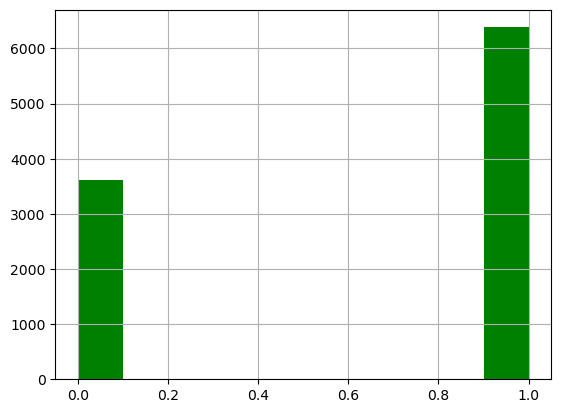

In [1351]:
df['Zero Balance'].hist(color='g')

# (4) DATA PREPROCESSING

In [1353]:
df.groupby(['Churn', 'Geography']).count()

Surname  CreditScore  Gender   Age  Tenure  Balance  \
Churn Geography                                                        
0     0             2064         2064    2064  2064    2064     2064   
      1             1695         1695    1695  1695    1695     1695   
      2             4204         4204    4204  4204    4204     4204   
1     0              413          413     413   413     413      413   
      1              814          814     814   814     814      814   
      2              810          810     810   810     810      810   

                 Num Of Products  Has Credit Card  Is Active Member  \
Churn Geography                                                       
0     0                     2064             2064              2064   
      1                     1695             1695              1695   
      2                     4204             4204              4204   
1     0                      413              413               413   
      1                      814              814               814   
      2                      810              810               810   

                 Estimated Salary  Zero Balance  
Churn Geography                                  
0     0                      2064          2064  
      1                      1695          1695  
      2                      4204          4204  
1     0                       413           413  
      1                       814           814  
      2                       810           810

# (5) FEATURE VARIABLES (X) AND TARGET VARIABLE (Y)

In [1355]:
df.columns

Index(['Surname', 'CreditScore', 'Geography', 'Gender', 'Age', 'Tenure',
       'Balance', 'Num Of Products', 'Has Credit Card', 'Is Active Member',
       'Estimated Salary', 'Churn', 'Zero Balance'],
      dtype='object')

In [1356]:
X = df.drop(['Surname','Churn'], axis=1)

In [1357]:
Y = df['Churn']

In [1358]:
X.shape, Y.shape

((10000, 11), (10000,))

In [1359]:
df['Churn'].value_counts()

Churn
0    7963
1    2037
Name: count, dtype: int64

<Axes: xlabel='Churn', ylabel='count'>

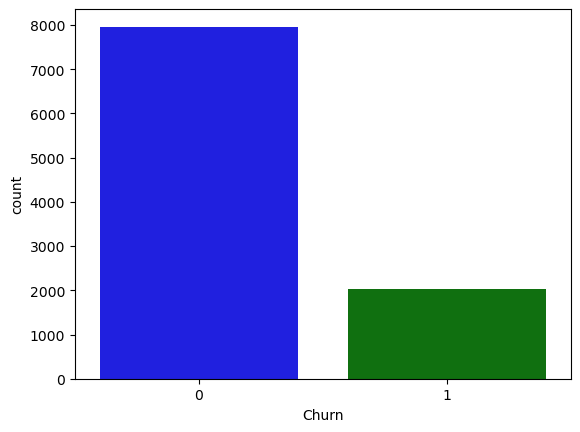

In [1360]:
sns.countplot(x='Churn', hue='Churn', data=df, palette=['blue', 'green'], legend=False)

# (6) HANDLING IMBALANCE DATA

# (A) RANDOM UNDER SAMPLING (rus)

In [1363]:
from imblearn.under_sampling import RandomUnderSampler

In [1364]:
rus = RandomUnderSampler(random_state=2529)

In [1365]:
X_rus, Y_rus = rus.fit_resample(X, Y)

In [1366]:
X_rus.shape, Y_rus.shape, X.shape, Y.shape

((4074, 11), (4074,), (10000, 11), (10000,))

In [1367]:
Y.value_counts()

Churn
0    7963
1    2037
Name: count, dtype: int64

In [1368]:
Y_rus.value_counts()

Churn
0    2037
1    2037
Name: count, dtype: int64

<Axes: ylabel='Frequency'>

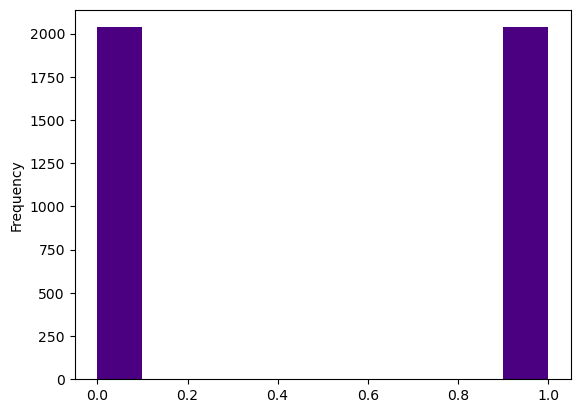

In [1369]:
Y_rus.plot(kind = 'hist', color = '#4B0082')

# (B) RANDOM OVER SAMPLING (ros)

In [1371]:
from imblearn.over_sampling import RandomOverSampler

In [1372]:
ros = RandomOverSampler(random_state=2529)

In [1373]:
X_ros, Y_ros = ros.fit_resample(X, Y)

In [1374]:
X_ros.shape, Y_ros.shape, X.shape, Y.shape

((15926, 11), (15926,), (10000, 11), (10000,))

In [1375]:
Y.value_counts()

Churn
0    7963
1    2037
Name: count, dtype: int64

In [1376]:
Y_ros.value_counts()

Churn
1    7963
0    7963
Name: count, dtype: int64

<Axes: ylabel='Frequency'>

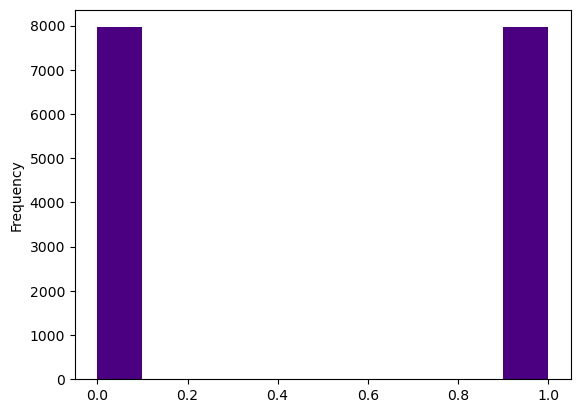

In [1377]:
Y_ros.plot(kind = 'hist', color = '#4B0082')

# (7) TRAIN TEST SPLITS

In [1379]:
from sklearn.model_selection import train_test_split

# SPLIT ORIGINAL DATA

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=2529)

# SPLIT RANDOM UNDER SAMPLE DATA

In [1383]:
X_train_rus, X_test_rus, Y_train_rus, Y_test_rus = train_test_split(X_rus, Y_rus, test_size=0.3, random_state=2529)

# SPLIT RANDOM OVER SAMPLE DATA

In [1385]:
X_train_ros, X_test_ros, Y_train_ros, Y_test_ros = train_test_split(X_ros, Y_ros, test_size=0.3, random_state=2529)

# STANDARDIZE FEATURES

In [1387]:
from sklearn.preprocessing import StandardScaler

In [1388]:
sc = StandardScaler()

# STANDARDIZE ORIGINAL DATA

In [1390]:
X_train[['CreditScore', 'Age', 'Tenure', 'Balance', 'Estimated Salary']] = sc.fit_transform(X_train[['CreditScore', 'Age', 'Tenure', 'Balance', 'Estimated Salary']])

In [1391]:
X_test[['CreditScore', 'Age', 'Tenure', 'Balance', 'Estimated Salary']] = sc.fit_transform(X_test[['CreditScore', 'Age', 'Tenure', 'Balance', 'Estimated Salary']])

# STANDARDIZE RANDOM UNDER SAMPLE DATA

In [1393]:
X_train_rus[['CreditScore', 'Age', 'Tenure', 'Balance', 'Estimated Salary']] = sc.fit_transform(X_train_rus[['CreditScore', 'Age', 'Tenure', 'Balance', 'Estimated Salary']])

In [1394]:
X_test_rus[['CreditScore', 'Age', 'Tenure', 'Balance', 'Estimated Salary']] = sc.fit_transform(X_test_rus[['CreditScore', 'Age', 'Tenure', 'Balance', 'Estimated Salary']])

# STANDARDIZE RANDOM OVER SAMPLE DATA

In [1396]:
X_train_ros[['CreditScore', 'Age', 'Tenure', 'Balance', 'Estimated Salary']] = sc.fit_transform(X_train_ros[['CreditScore', 'Age', 'Tenure', 'Balance', 'Estimated Salary']])

In [1397]:
X_test_ros[['CreditScore', 'Age', 'Tenure', 'Balance', 'Estimated Salary']] = sc.fit_transform(X_test_ros[['CreditScore', 'Age', 'Tenure', 'Balance', 'Estimated Salary']])

# (8) SUPPORT VECTOR MACHINE CLASSIFIER

In [1399]:
from sklearn.svm import SVC

In [1400]:
svc = SVC()

In [1401]:
svc.fit(X_train, Y_train)

SVC()

In [1402]:
Y_pred = svc.predict(X_test)

# (9) MODEL ACCURACY

In [1404]:
from sklearn.metrics import confusion_matrix, classification_report

In [1405]:
confusion_matrix(Y_test, Y_pred)

array([[2382,   32],
       [ 441,  145]], dtype=int64)

In [1406]:
print(classification_report(Y_test, Y_pred))

              precision    recall  f1-score   support

           0       0.84      0.99      0.91      2414
           1       0.82      0.25      0.38       586

    accuracy                           0.84      3000
   macro avg       0.83      0.62      0.64      3000
weighted avg       0.84      0.84      0.81      3000



# HYPERPARAMETER TUNNING

In [1408]:
from sklearn.model_selection import GridSearchCV

In [1409]:
param_grid = { 'C': [ 0.1, 1, 10],
               'gamma' : [1, 0.1, 0.01],
               'kernel' : ['rbf'],
               'class_weight' : ['balanced']} 

In [1410]:
grid = GridSearchCV(SVC(), param_grid, refit=True, verbose=2, cv = 2)
grid.fit(X_train, Y_train)

Fitting 2 folds for each of 9 candidates, totalling 18 fits
[CV] END ..C=0.1, class_weight=balanced, gamma=1, kernel=rbf; total time=   1.5s
[CV] END ..C=0.1, class_weight=balanced, gamma=1, kernel=rbf; total time=   1.5s
[CV] END C=0.1, class_weight=balanced, gamma=0.1, kernel=rbf; total time=   1.0s
[CV] END C=0.1, class_weight=balanced, gamma=0.1, kernel=rbf; total time=   1.1s
[CV] END C=0.1, class_weight=balanced, gamma=0.01, kernel=rbf; total time=   1.2s
[CV] END C=0.1, class_weight=balanced, gamma=0.01, kernel=rbf; total time=   1.2s
[CV] END ....C=1, class_weight=balanced, gamma=1, kernel=rbf; total time=   1.3s
[CV] END ....C=1, class_weight=balanced, gamma=1, kernel=rbf; total time=   1.2s
[CV] END ..C=1, class_weight=balanced, gamma=0.1, kernel=rbf; total time=   0.8s
[CV] END ..C=1, class_weight=balanced, gamma=0.1, kernel=rbf; total time=   0.9s
[CV] END .C=1, class_weight=balanced, gamma=0.01, kernel=rbf; total time=   1.0s
[CV] END .C=1, class_weight=balanced, gamma=0.0

GridSearchCV(cv=2, estimator=SVC(),
             param_grid={'C': [0.1, 1, 10], 'class_weight': ['balanced'],
                         'gamma': [1, 0.1, 0.01], 'kernel': ['rbf']},
             verbose=2)

In [1411]:
print(grid.best_estimator_)

SVC(C=10, class_weight='balanced', gamma=1)


In [1412]:
grid_predictions = grid.predict(X_test)

In [1413]:
confusion_matrix(Y_test, grid_predictions)

array([[2159,  255],
       [ 343,  243]], dtype=int64)

In [1414]:
print(classification_report(Y_test, grid_predictions))

              precision    recall  f1-score   support

           0       0.86      0.89      0.88      2414
           1       0.49      0.41      0.45       586

    accuracy                           0.80      3000
   macro avg       0.68      0.65      0.66      3000
weighted avg       0.79      0.80      0.79      3000



# MODEL WITH RANDOM UNDER SAMPLING

In [1416]:
svc_rus = SVC()

In [1417]:
svc_rus.fit(X_train_rus, Y_train_rus)

SVC()

In [1418]:
Y_pred_rus = svc_rus.predict(X_test_rus)

# MODEL ACCURACY

In [1420]:
confusion_matrix(Y_test_rus, Y_pred_rus)

array([[470, 157],
       [174, 422]], dtype=int64)

In [1421]:
print(classification_report(Y_test_rus, Y_pred_rus))

              precision    recall  f1-score   support

           0       0.73      0.75      0.74       627
           1       0.73      0.71      0.72       596

    accuracy                           0.73      1223
   macro avg       0.73      0.73      0.73      1223
weighted avg       0.73      0.73      0.73      1223



# HPYERPARAMETER TUNNING

In [1423]:
param_grid = { 'C': [ 0.1, 1, 10],
               'gamma' : [1, 0.1, 0.01],
               'kernel' : ['rbf'],
               'class_weight' : ['balanced']} 

In [1424]:
grid_rus = GridSearchCV(SVC(), param_grid, refit=True, verbose=2, cv = 2)
grid_rus.fit(X_train_rus, Y_train_rus)

Fitting 2 folds for each of 9 candidates, totalling 18 fits
[CV] END ..C=0.1, class_weight=balanced, gamma=1, kernel=rbf; total time=   0.1s
[CV] END ..C=0.1, class_weight=balanced, gamma=1, kernel=rbf; total time=   0.2s
[CV] END C=0.1, class_weight=balanced, gamma=0.1, kernel=rbf; total time=   0.1s
[CV] END C=0.1, class_weight=balanced, gamma=0.1, kernel=rbf; total time=   0.1s
[CV] END C=0.1, class_weight=balanced, gamma=0.01, kernel=rbf; total time=   0.1s
[CV] END C=0.1, class_weight=balanced, gamma=0.01, kernel=rbf; total time=   0.1s
[CV] END ....C=1, class_weight=balanced, gamma=1, kernel=rbf; total time=   0.1s
[CV] END ....C=1, class_weight=balanced, gamma=1, kernel=rbf; total time=   0.1s
[CV] END ..C=1, class_weight=balanced, gamma=0.1, kernel=rbf; total time=   0.1s
[CV] END ..C=1, class_weight=balanced, gamma=0.1, kernel=rbf; total time=   0.1s
[CV] END .C=1, class_weight=balanced, gamma=0.01, kernel=rbf; total time=   0.1s
[CV] END .C=1, class_weight=balanced, gamma=0.0

GridSearchCV(cv=2, estimator=SVC(),
             param_grid={'C': [0.1, 1, 10], 'class_weight': ['balanced'],
                         'gamma': [1, 0.1, 0.01], 'kernel': ['rbf']},
             verbose=2)

In [1425]:
print(grid_rus.best_estimator_)

SVC(C=1, class_weight='balanced', gamma=0.1)


In [1426]:
grid_predictions_rus = grid_rus.predict(X_test_rus)

In [1427]:
confusion_matrix(Y_test_rus, grid_predictions_rus)

array([[476, 151],
       [172, 424]], dtype=int64)

In [1428]:
print(classification_report(Y_test_rus, grid_predictions_rus))

              precision    recall  f1-score   support

           0       0.73      0.76      0.75       627
           1       0.74      0.71      0.72       596

    accuracy                           0.74      1223
   macro avg       0.74      0.74      0.74      1223
weighted avg       0.74      0.74      0.74      1223



# MODEL WITH RANDOM OVER SAMPLING

In [1430]:
svc_ros = SVC()

In [1431]:
svc_ros.fit(X_train_ros, Y_train_ros)

SVC()

In [1432]:
Y_pred_ros = svc_ros.predict(X_test_ros)

# MODEL ACCURACY

In [1434]:
confusion_matrix(Y_test_ros, Y_pred_ros)

array([[1823,  556],
       [ 626, 1773]], dtype=int64)

In [1435]:
print(classification_report(Y_test_ros, Y_pred_ros))

              precision    recall  f1-score   support

           0       0.74      0.77      0.76      2379
           1       0.76      0.74      0.75      2399

    accuracy                           0.75      4778
   macro avg       0.75      0.75      0.75      4778
weighted avg       0.75      0.75      0.75      4778



# HYPERPARAMETER TUNNING

In [1437]:
param_grid = { 'C': [ 0.1, 1, 10],
               'gamma' : [1, 0.1, 0.01],
               'kernel' : ['rbf'],
               'class_weight' : ['balanced']} 

In [1438]:
grid_ros = GridSearchCV(SVC(), param_grid, refit=True, verbose=2, cv = 2)
grid_ros.fit(X_train_ros, Y_train_ros)

Fitting 2 folds for each of 9 candidates, totalling 18 fits
[CV] END ..C=0.1, class_weight=balanced, gamma=1, kernel=rbf; total time=   3.8s
[CV] END ..C=0.1, class_weight=balanced, gamma=1, kernel=rbf; total time=   3.9s
[CV] END C=0.1, class_weight=balanced, gamma=0.1, kernel=rbf; total time=   2.8s
[CV] END C=0.1, class_weight=balanced, gamma=0.1, kernel=rbf; total time=   2.9s
[CV] END C=0.1, class_weight=balanced, gamma=0.01, kernel=rbf; total time=   3.4s
[CV] END C=0.1, class_weight=balanced, gamma=0.01, kernel=rbf; total time=   3.0s
[CV] END ....C=1, class_weight=balanced, gamma=1, kernel=rbf; total time=   3.1s
[CV] END ....C=1, class_weight=balanced, gamma=1, kernel=rbf; total time=   3.1s
[CV] END ..C=1, class_weight=balanced, gamma=0.1, kernel=rbf; total time=   2.4s
[CV] END ..C=1, class_weight=balanced, gamma=0.1, kernel=rbf; total time=   2.4s
[CV] END .C=1, class_weight=balanced, gamma=0.01, kernel=rbf; total time=   2.7s
[CV] END .C=1, class_weight=balanced, gamma=0.0

GridSearchCV(cv=2, estimator=SVC(),
             param_grid={'C': [0.1, 1, 10], 'class_weight': ['balanced'],
                         'gamma': [1, 0.1, 0.01], 'kernel': ['rbf']},
             verbose=2)

In [1439]:
print(grid_ros.best_estimator_)

SVC(C=10, class_weight='balanced', gamma=1)


In [1440]:
grid_predictions_ros = grid_ros.predict(X_test_ros)

In [1441]:
confusion_matrix(Y_test_ros, grid_predictions_ros)

array([[2047,  332],
       [  68, 2331]], dtype=int64)

In [1442]:
print(classification_report(Y_test_ros, grid_predictions_ros))

              precision    recall  f1-score   support

           0       0.97      0.86      0.91      2379
           1       0.88      0.97      0.92      2399

    accuracy                           0.92      4778
   macro avg       0.92      0.92      0.92      4778
weighted avg       0.92      0.92      0.92      4778



In [1443]:
print(classification_report(Y_test, Y_pred))

              precision    recall  f1-score   support

           0       0.84      0.99      0.91      2414
           1       0.82      0.25      0.38       586

    accuracy                           0.84      3000
   macro avg       0.83      0.62      0.64      3000
weighted avg       0.84      0.84      0.81      3000



In [1444]:
print(classification_report(Y_test, grid_predictions))

              precision    recall  f1-score   support

           0       0.86      0.89      0.88      2414
           1       0.49      0.41      0.45       586

    accuracy                           0.80      3000
   macro avg       0.68      0.65      0.66      3000
weighted avg       0.79      0.80      0.79      3000



In [1445]:
print(classification_report(Y_test_rus, Y_pred_rus))

              precision    recall  f1-score   support

           0       0.73      0.75      0.74       627
           1       0.73      0.71      0.72       596

    accuracy                           0.73      1223
   macro avg       0.73      0.73      0.73      1223
weighted avg       0.73      0.73      0.73      1223



In [1446]:
print(classification_report(Y_test_rus, grid_predictions_rus))

              precision    recall  f1-score   support

           0       0.73      0.76      0.75       627
           1       0.74      0.71      0.72       596

    accuracy                           0.74      1223
   macro avg       0.74      0.74      0.74      1223
weighted avg       0.74      0.74      0.74      1223



In [1447]:
print(classification_report(Y_test_ros, Y_pred_ros))

              precision    recall  f1-score   support

           0       0.74      0.77      0.76      2379
           1       0.76      0.74      0.75      2399

    accuracy                           0.75      4778
   macro avg       0.75      0.75      0.75      4778
weighted avg       0.75      0.75      0.75      4778



In [1448]:
print(classification_report(Y_test_ros, grid_predictions_ros))

              precision    recall  f1-score   support

           0       0.97      0.86      0.91      2379
           1       0.88      0.97      0.92      2399

    accuracy                           0.92      4778
   macro avg       0.92      0.92      0.92      4778
weighted avg       0.92      0.92      0.92      4778

